# Animal Shelter Analytics

> ### Technical Skills for this Project: Python(Pandas, Seaborn), Tableau, EDA, Statistics.

Task Details: looking for a way to make meaningful impact. To do that, you'll explore and analyze an animal shelter's data and give them 1-3 actionable insights.

I need to analyze the data set to understand this problem and propose data-driven solutions.

## Table of contents
1. [Pre processing](#introduction)
2. [Exploratory Data Analysis](#paragraph1)
3. [Statistical Analysis](#paragraph2)
4. [Data Visualization](#paragraph3)

In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# First view to the dataset
C_i = pd.read_csv('Austin_Animal_Center_Intakes.csv', parse_dates=True)
C_o = pd.read_csv('Austin_Animal_Center_Outcomes.csv', parse_dates=True)
C_sm = pd.read_csv('Austin_Animal_Center_Stray_Map.csv', parse_dates=True)

In [3]:
C_sm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Animal ID       16 non-null     object
 1   Found Location  16 non-null     object
 2   At AAC          16 non-null     object
 3   Intake Date     16 non-null     object
 4   Type            16 non-null     object
 5   Looks Like      16 non-null     object
 6   Color           16 non-null     object
 7   Sex             16 non-null     object
 8   Age             16 non-null     object
 9   Image Link      16 non-null     object
dtypes: object(10)
memory usage: 1.4+ KB


Observations: 
    
    - in C_i and C_o im going to delete 'MonthYear'
    
    - C_i and C_o has some null values 
    
    - need to fix the datetime (C_i, C_o)
    
    - there are some dtypes to change 
    
    - some strings got special caracters 
    
    - i can separete the hour of datetime
    
    - C_sm delete image link 

## Section 01: Pre Processing <a name="introduction"></a>

In [4]:
# im going ti start with C_sm, fixing dates
C_sm['Intake Date'] = pd.to_datetime(C_sm['Intake Date'])

In [5]:
C_sm.drop(['Image Link'], axis=1, inplace=True)

In [6]:
#chaging dtypes
C_sm['At AAC'] = C_sm['At AAC'].astype('category')
C_sm['Type'] = C_sm['Type'].astype('category')
C_sm['Sex'] = C_sm['Sex'].astype('category')

In [7]:
#Set the id column
C_sm = C_sm.set_index('Animal ID')

In [8]:
#finished firt dataset
C_sm

,Found Location,At AAC,Intake Date,Type,Looks Like,Color,Sex,Age
Animal ID,,,,,,,,
A814119,11800 GREEN GROVE DRIVE\nAUSTIN 78725\n(30.221...,Yes (come to the shelter),2021-02-19,Dog,Pit Bull,Brown Brindle,Neutered Male,3 years
A829667,9807 MARLBOROUGH DRIVE\nAUSTIN 78753\n(30.3573...,Yes (come to the shelter),2021-02-20,Dog,Anatolian Shepherd Mix,Yellow,Intact Male,2 years
A829669,12501 TECH RIDGE BOULEVARD\nAUSTIN 78753\n(30....,Yes (come to the shelter),2021-02-20,Dog,Labrador Retriever Mix,Tan/White,Spayed Female,2 years
A829713,10605 OLD LOCKHART ROAD\nAUSTIN 78747\n(30.128...,Yes (come to the shelter),2021-02-21,Dog,Doberman Pinsch,Black/Tan,Intact Female,6 months
A829659,"14204 JACOBSON ROAD\nAUSTIN 78617\n(30.137238,...",Yes (come to the shelter),2021-02-19,Dog,Labrador Retriever,Black/White,Intact Female,5 months
A829660,"14204 JACOBSON ROAD\nAUSTIN 78617\n(30.137238,...",Yes (come to the shelter),2021-02-19,Dog,Carolina Dog,Yellow Brindle/White,Intact Female,5 months
A829661,"9604 CARSON CREEK\nAUSTIN 78617\n(30.224098, -...",Yes (come to the shelter),2021-02-19,Cat,Domestic Shorthair,Orange Tabby,Intact Male,1 year
A829664,"DEL VALLE AUSTIN 78719\n(30.143087, -97.673385)",Yes (come to the shelter),2021-02-20,Dog,Labrador Retriever,Brown/Black,Intact Male,2 years
A829672,"AUSTIN 78744\n(30.186349, -97.738673)",Yes (come to the shelter),2021-02-20,Dog,Doberman Pinsch,Black/Tan,Intact Female,6 months


In [9]:
C_o['DateTime']

0         05/08/2019 06:20:00 PM
1         07/18/2018 04:02:00 PM
2         08/16/2020 11:38:00 AM
3         02/13/2016 05:59:00 PM
4         03/18/2014 11:47:00 AM
                   ...          
124486    03/03/2021 04:20:00 PM
124487    12/28/2020 03:49:00 PM
124488    03/03/2021 04:59:00 PM
124489    03/03/2021 05:57:00 PM
124490    03/03/2021 05:19:00 PM
Name: DateTime, Length: 124491, dtype: object

In [10]:
#Set the id column
C_o = C_o.set_index('Animal ID')

In [11]:
C_o['Name'] = C_o['Name'].str.replace('*', '')

In [12]:
C_o['Date of Birth'] = pd.to_datetime(C_o['Date of Birth'])

In [13]:
C_o.drop(['MonthYear'], axis=1, inplace=True)

In [14]:
hour = C_o['DateTime'].str.split(' ',1, expand = True)
C_o['hour'] = hour[0]
C_o['hour'] = hour[1]

In [15]:
C_o['DateTime'] = C_o['DateTime'].str.split(' ', expand = True)

In [16]:
C_o['DateTime'] = pd.to_datetime(C_o['DateTime'])

In [17]:
#Outcome Type- Animal Type - Sex upon Outcome - Outcome Subtype
C_o['Outcome Subtype'].value_counts()

Partner                30811
Foster                 10901
Rabies Risk             3682
Suffering               3237
SCRP                    3211
Snr                     2680
In Kennel                596
Aggressive               539
Offsite                  383
Medical                  303
In Foster                295
At Vet                   256
Behavior                 159
Enroute                   84
Field                     36
Underage                  36
Court/Investigation       29
In Surgery                22
Possible Theft            16
Barn                      11
Prc                       10
Customer S                 7
Emer                       4
Name: Outcome Subtype, dtype: int64

In [18]:
#chaging dtypes
C_o['Outcome Type'] = C_o['Outcome Type'].astype('category')
C_o['Animal Type'] = C_o['Animal Type'].astype('category')
C_o['Sex upon Outcome'] = C_o['Sex upon Outcome'].astype('category')

In [19]:
#finished second dataset
C_o.info()

<class 'pandas.core.frame.DataFrame'>
Index: 124491 entries, A794011 to A828158
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Name              85466 non-null   object        
 1   DateTime          124491 non-null  datetime64[ns]
 2   Date of Birth     124491 non-null  datetime64[ns]
 3   Outcome Type      124471 non-null  category      
 4   Outcome Subtype   57308 non-null   object        
 5   Animal Type       124491 non-null  category      
 6   Sex upon Outcome  124490 non-null  category      
 7   Age upon Outcome  124486 non-null  object        
 8   Breed             124491 non-null  object        
 9   Color             124491 non-null  object        
 10  hour              124491 non-null  object        
dtypes: category(3), datetime64[ns](2), object(6)
memory usage: 8.9+ MB


In [20]:
#Set the id column
C_i = C_i.set_index('Animal ID')

#cleaning strings in name
C_i['Name'] = C_i['Name'].str.replace('*', '')

#eliminate useless columns
C_i.drop(['MonthYear'], axis=1, inplace=True)

#create another maybe usefull column
hour = C_i['DateTime'].str.split(' ',1, expand = True)
C_i['hour'] = hour[0]
C_i['hour'] = hour[1]
C_i['DateTime'] = C_i['DateTime'].str.split(' ', expand = True)
C_i['DateTime'] = pd.to_datetime(C_i['DateTime'])

In [21]:
#chaging dtypes
C_i['Intake Type'] = C_i['Intake Type'].astype('category')
C_i['Intake Condition'] = C_i['Intake Condition'].astype('category')
C_i['Animal Type'] = C_i['Animal Type'].astype('category')
C_i['Sex upon Intake'] = C_i['Sex upon Intake'].astype('category')

In [22]:
#Intake Type	Intake Condition	Animal Type	Sex upon Intake
C_i['Sex upon Intake'].value_counts()

Intact Male      40316
Intact Female    38118
Neutered Male    19142
Spayed Female    16310
Unknown          10233
Name: Sex upon Intake, dtype: int64

In [23]:
#finished third dataset
C_i.info()

<class 'pandas.core.frame.DataFrame'>
Index: 124120 entries, A786884 to A830181
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Name              85069 non-null   object        
 1   DateTime          124120 non-null  datetime64[ns]
 2   Found Location    124120 non-null  object        
 3   Intake Type       124120 non-null  category      
 4   Intake Condition  124120 non-null  category      
 5   Animal Type       124120 non-null  category      
 6   Sex upon Intake   124119 non-null  category      
 7   Age upon Intake   124120 non-null  object        
 8   Breed             124120 non-null  object        
 9   Color             124120 non-null  object        
 10  hour              124120 non-null  object        
dtypes: category(4), datetime64[ns](1), object(6)
memory usage: 8.1+ MB


In [24]:
#Cheking duplicates
C_i.duplicated().any()
C_i = C_i.drop_duplicates()

In [25]:
C_o.duplicated().any()
C_o = C_o.drop_duplicates()

In [26]:
C_sm.duplicated().any()

False

In [27]:
#Cheking null values
C_i.isna().sum()

Name                35260
DateTime                0
Found Location          0
Intake Type             0
Intake Condition        0
Animal Type             0
Sex upon Intake         1
Age upon Intake         0
Breed                   0
Color                   0
hour                    0
dtype: int64

In [28]:
C_o.isna().sum()

Name                36983
DateTime                0
Date of Birth           0
Outcome Type           20
Outcome Subtype     67032
Animal Type             0
Sex upon Outcome        1
Age upon Outcome        5
Breed                   0
Color                   0
hour                    0
dtype: int64

In [29]:
C_sm.isna().sum()

Found Location    0
At AAC            0
Intake Date       0
Type              0
Looks Like        0
Color             0
Sex               0
Age               0
dtype: int64

In [30]:
# im not going to delete the null values because i dont think they re going to be a problem 

## Section 2: Exploratory Data Analysis <a name="paragraph1"></a>

In [31]:
#Basic statistics 
C_i.describe(include='all')

<ipython-input-31-aa6ff710ce51>:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  C_i.describe(include='all')


,Name,DateTime,Found Location,Intake Type,Intake Condition,Animal Type,Sex upon Intake,Age upon Intake,Breed,Color,hour
count,85033,120293,120293,120293,120293,120293,120292,120293,120293,120293,120293
unique,15927,2709,53703,6,10,5,5,52,2629,595,1303
top,Max,2014-07-09 00:00:00,Austin (TX),Stray,Normal,Dog,Intact Male,1 year,Domestic Shorthair Mix,Black/White,11:01:00 AM
freq,622,132,22379,83564,104907,69448,39114,21449,29295,12629,547
first,NaN,2013-10-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,2021-03-03 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [32]:
# in firts check, we can see many things like:
# top	Max	2014-07-09 00:00:00	Austin (TX)	Stray	Normal	Dog	Intact Male	1 year	Domestic Shorthair Mix	Black/White	11:01:00 AM
# 2016 is the mean and 6 is the mean month
# im going to chek the distribution and other things by each column 

In [33]:
#how many pets are without a name?
ss = C_i['Name'].isna().sum()
print(f'there are {ss} pets without a name')

there are 35260 pets without a name


In [34]:
C_i['year'] = pd.DatetimeIndex(C_i['DateTime']).year
C_i['month'] = pd.DatetimeIndex(C_i['DateTime']).month
C_i['day'] = pd.DatetimeIndex(C_i['DateTime']).day

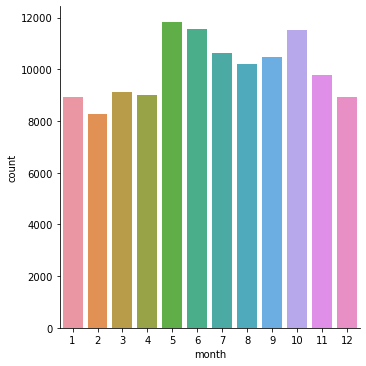

In [35]:
sns.catplot(x="month", kind="count", data=C_i)

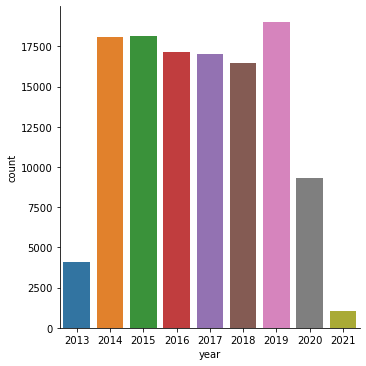

In [36]:
sns.catplot(x="year", kind="count", data=C_i)

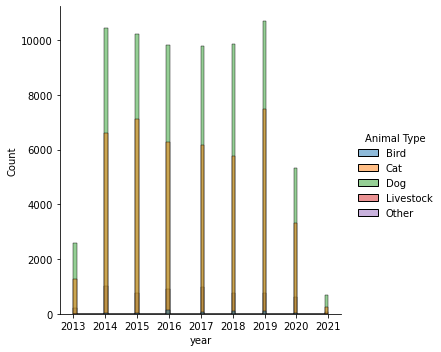

In [37]:
sns.displot(C_i, x="year", hue="Animal Type")

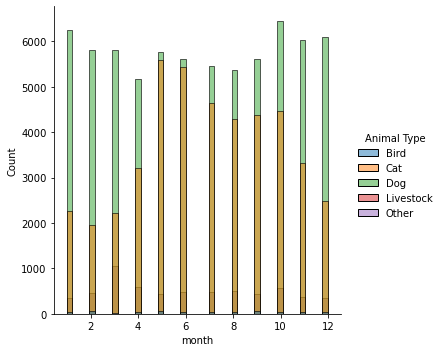

In [38]:
sns.displot(C_i, x="month", hue="Animal Type")

In [39]:
# the year with more pets sheltered are 2019,2015,2014 and the months with more pets sheltered are 5,6,10

In [40]:
C_i['Intake Type'].value_counts()

Stray                 83564
Owner Surrender       24168
Public Assist          7481
Wildlife               4557
Abandoned               266
Euthanasia Request      257
Name: Intake Type, dtype: int64

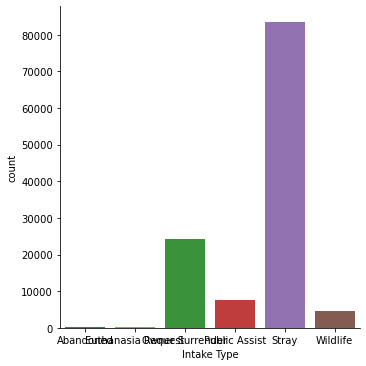

In [41]:
sns.catplot(x="Intake Type", kind="count", data=C_i)

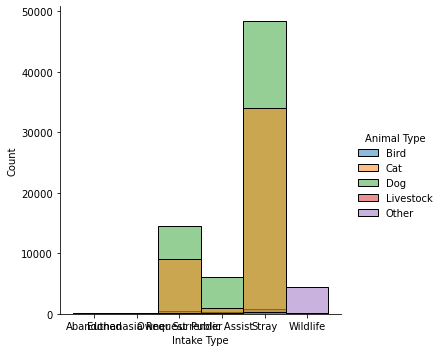

In [42]:
sns.displot(C_i, x="Intake Type", hue="Animal Type")

In [43]:
C_i[(C_i['Intake Type'] == 'Stray') & (C_i['Intake Condition'] == 'Sick')].count()

Name                1102
DateTime            2546
Found Location      2546
Intake Type         2546
Intake Condition    2546
Animal Type         2546
Sex upon Intake     2546
Age upon Intake     2546
Breed               2546
Color               2546
hour                2546
year                2546
month               2546
day                 2546
dtype: int64

In [44]:
ddd = C_i.drop(C_i[C_i['Intake Condition']=='Normal'].index)

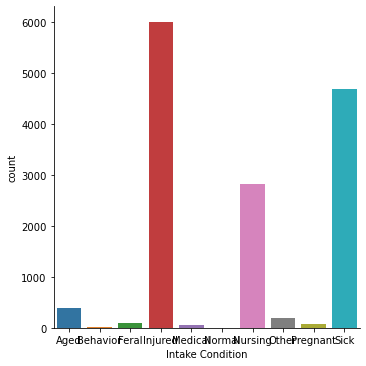

In [45]:
sns.catplot(x="Intake Condition", kind='count', data=ddd)
# there are more normal condition but i want to see in what other condition are more
# injured, sick and nursing

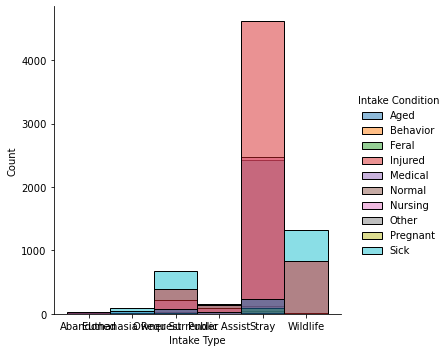

In [46]:
sns.displot(ddd, x="Intake Type", hue="Intake Condition")#without intake condition == normal 

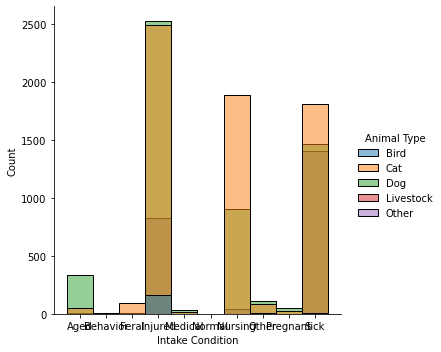

In [47]:
sns.displot(ddd, x="Intake Condition", hue="Animal Type")

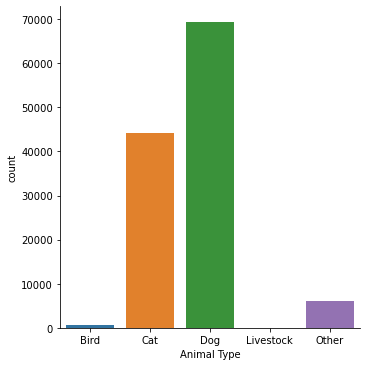

In [48]:
sns.catplot(x="Animal Type", kind="count", data=C_i)

In [49]:
C_i[(C_i['Animal Type'] == 'Dog') & (C_i['Intake Condition'] == 'Sick')].count()

Name                1075
DateTime            1633
Found Location      1633
Intake Type         1633
Intake Condition    1633
Animal Type         1633
Sex upon Intake     1633
Age upon Intake     1633
Breed               1633
Color               1633
hour                1633
year                1633
month               1633
day                 1633
dtype: int64

In [50]:
ifixed = C_i.drop(['Breed', 'Age upon Intake', 'hour', 'Found Location', 'DateTime', 'Name'], axis=1)

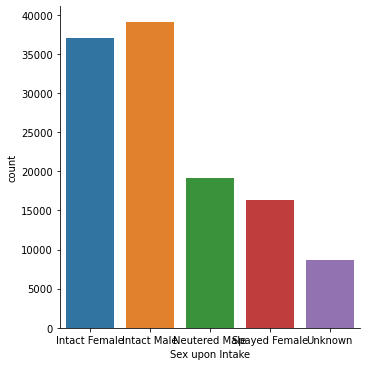

In [51]:
sns.catplot(x="Sex upon Intake", kind="count", data=C_i)

1 year      21449
2 years     18943
1 month     11374
3 years      7428
2 months     6453
4 years      4447
4 weeks      4144
5 years      4054
3 months     3183
3 weeks      3155
Name: Age upon Intake, dtype: int64

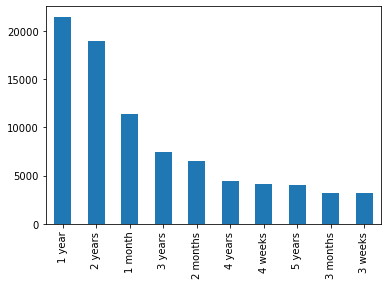

In [65]:
C_i['Age upon Intake'].value_counts().head(10).plot(kind='bar')
C_i['Age upon Intake'].value_counts().head(10)

Austin (TX)                          22379
Travis (TX)                           1897
Outside Jurisdiction                  1511
7201 Levander Loop in Austin (TX)      783
Manor (TX)                             598
Name: Found Location, dtype: int64

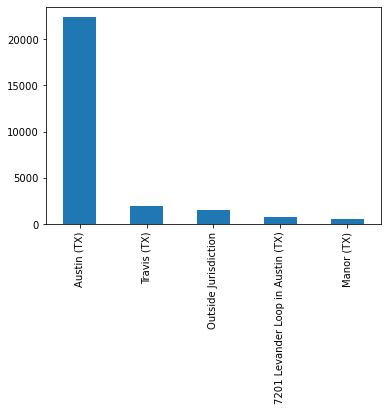

In [64]:
C_i['Found Location'].value_counts().head().plot(kind='bar')
C_i['Found Location'].value_counts().head()

In [55]:
# im trying to plot each animal type condition then conbine and play with Sex upon Intake and see the distribution of all of them

In [56]:
intake_dummy = pd.get_dummies(C_i['Intake Type'], prefix='Intake Type')
intakec_dummy = pd.get_dummies(C_i['Intake Condition'], prefix='Intake Condition')
animal_dummy = pd.get_dummies(C_i['Animal Type'], prefix='Animal Type')
sex_dummy = pd.get_dummies(C_i['Sex upon Intake'], prefix='Sex upon Intake')
color_dummy = pd.get_dummies(C_i['Color'], prefix='Color')

In [57]:
ifixed = pd.concat([ifixed, intake_dummy], axis=1)
ifixed = pd.concat([ifixed, intakec_dummy], axis=1)
ifixed = pd.concat([ifixed, animal_dummy], axis=1)
ifixed = pd.concat([ifixed, sex_dummy], axis=1)
ifixed = pd.concat([ifixed, color_dummy], axis=1)

In [58]:
ifixed = ifixed.drop(['Intake Type', 'Intake Condition', 'Animal Type', 'Sex upon Intake', 'Color'], axis=1)

In [59]:
# im going to see relation plots and regressions, and pearson relation.

In [94]:
pd.set_option('display.max_columns', None)

In [96]:
ifixed

,year,month,day,Intake Type_Abandoned,Intake Type_Euthanasia Request,Intake Type_Owner Surrender,Intake Type_Public Assist,Intake Type_Stray,Intake Type_Wildlife,Intake Condition_Aged,Intake Condition_Behavior,Intake Condition_Feral,Intake Condition_Injured,Intake Condition_Medical,Intake Condition_Normal,Intake Condition_Nursing,Intake Condition_Other,Intake Condition_Pregnant,Intake Condition_Sick,Animal Type_Bird,Animal Type_Cat,Animal Type_Dog,Animal Type_Livestock,Animal Type_Other,Sex upon Intake_Intact Female,Sex upon Intake_Intact Male,Sex upon Intake_Neutered Male,Sex upon Intake_Spayed Female,Sex upon Intake_Unknown,Color_Agouti,Color_Agouti/Brown Tabby,Color_Agouti/Cream,Color_Agouti/Gray,Color_Agouti/White,Color_Apricot,Color_Apricot/Brown,Color_Apricot/Tricolor,Color_Apricot/White,Color_Black,Color_Black Brindle,Color_Black Brindle/Black,Color_Black Brindle/Blue,Color_Black Brindle/Blue Tick,Color_Black Brindle/Brown,Color_Black Brindle/Brown Brindle,Color_Black Brindle/Tan,Color_Black Brindle/White,Color_Black Smoke,Color_Black Smoke/Black,Color_Black Smoke/Black Tiger,Color_Black Smoke/Blue Tick,Color_Black Smoke/Brown,Color_Black Smoke/Brown Tabby,Color_Black Smoke/Chocolate,Color_Black Smoke/Gray,Color_Black Smoke/White,Color_Black Tabby,Color_Black Tabby/Black,Color_Black Tabby/Gray,Color_Black Tabby/Gray Tabby,Color_Black Tabby/Orange,Color_Black Tabby/White,Color_Black Tiger,Color_Black Tiger/White,Color_Black/Black,Color_Black/Black Brindle,Color_Black/Black Smoke,Color_Black/Black Tabby,Color_Black/Blue,Color_Black/Blue Merle,Color_Black/Blue Tick,Color_Black/Brown,Color_Black/Brown Brindle,Color_Black/Brown Merle,Color_Black/Brown Tabby,Color_Black/Buff,Color_Black/Chocolate,Color_Black/Cream,Color_Black/Fawn,Color_Black/Gold,Color_Black/Gray,Color_Black/Gray Tabby,Color_Black/Green,Color_Black/Orange,Color_Black/Pink,Color_Black/Red,Color_Black/Seal Point,Color_Black/Silver,Color_Black/Silver Tabby,Color_Black/Tan,Color_Black/Tortie,Color_Black/Tricolor,Color_Black/White,Color_Black/Yellow,Color_Black/Yellow Brindle,Color_Blue,Color_Blue Cream,Color_Blue Cream/Blue Tabby,Color_Blue Cream/Blue Tiger,Color_Blue Cream/Buff,Color_Blue Cream/Tortie,Color_Blue Cream/White,Color_Blue Merle,Color_Blue Merle/Black,Color_Blue Merle/Blue Merle,Color_Blue Merle/Brown,Color_Blue Merle/Brown Brindle,Color_Blue Merle/Cream,Color_Blue Merle/Gray,Color_Blue Merle/Red,Color_Blue Merle/Red Merle,Color_Blue Merle/Tan,Color_Blue Merle/Tricolor,Color_Blue Merle/White,Color_Blue Point,Color_Blue Point/Cream,Color_Blue Point/White,Color_Blue Smoke,Color_Blue Smoke/Brown,Color_Blue Smoke/Gray,Color_Blue Smoke/White,Color_Blue Tabby,Color_Blue Tabby/Black,Color_Blue Tabby/Blue Cream,Color_Blue Tabby/Brown,Color_Blue Tabby/Buff,Color_Blue Tabby/Cream,Color_Blue Tabby/Orange,Color_Blue Tabby/Tan,Color_Blue Tabby/Tortie,Color_Blue Tabby/White,Color_Blue Tick,Color_Blue Tick/Black,Color_Blue Tick/Brown,Color_Blue Tick/Brown Brindle,Color_Blue Tick/Red,Color_Blue Tick/Red Tick,Color_Blue Tick/Tan,Color_Blue Tick/Tricolor,Color_Blue Tick/White,Color_Blue Tiger,Color_Blue Tiger/White,Color_Blue/Black,Color_Blue/Black Brindle,Color_Blue/Blue,Color_Blue/Brown,Color_Blue/Brown Brindle,Color_Blue/Calico,Color_Blue/Cream,Color_Blue/Gray,Color_Blue/Green,Color_Blue/Orange,Color_Blue/Silver,Color_Blue/Tan,Color_Blue/Tortie,Color_Blue/Tricolor,Color_Blue/White,Color_Blue/Yellow,Color_Blue/Yellow Brindle,Color_Brown,Color_Brown Brindle,Color_Brown Brindle/Black,Color_Brown Brindle/Black Brindle,Color_Brown Brindle/Blue,Color_Brown Brindle/Blue Cream,Color_Brown Brindle/Blue Tick,Color_Brown Brindle/Brown,Color_Brown Brindle/Brown Brindle,Color_Brown Brindle/Brown Merle,Color_Brown Brindle/Gray,Color_Brown Brindle/Liver Tick,Color_Brown Brindle/Red Tick,Color_Brown Brindle/Tan,Color_Brown Brindle/Tricolor,Color_Brown Brindle/White,Color_Brown Merle,Color_Brown Merle/Black,Color_Brown Merle/Blue Merle,Color_Brown Merle/Brown,Color_Brown Merle/Bro

In [66]:
correlation = ifixed.corr(method='pearson')

In [68]:
correlation2 = ifixed.corr().style.format("{:.2}").background_gradient(cmap=plt.get_cmap('coolwarm'), axis=1)

In [109]:
correlation['Intake Type_Wildlife'].sort_values(ascending=False)

Intake Type_Wildlife           1.000000
Animal Type_Other              0.841201
Sex upon Intake_Unknown        0.686187
Color_Brown                    0.401653
Intake Condition_Sick          0.247238
                                 ...   
Sex upon Intake_Intact Male   -0.129649
Animal Type_Cat               -0.151351
Intake Condition_Normal       -0.208752
Animal Type_Dog               -0.231905
Intake Type_Stray             -0.299302
Name: Intake Type_Wildlife, Length: 624, dtype: float64

In [110]:
correlation['Intake Condition_Sick'].sort_values(ascending=False)

Intake Condition_Sick            1.000000
Intake Type_Wildlife             0.247238
Animal Type_Other                0.220574
Sex upon Intake_Unknown          0.190806
Color_Gray/Black                 0.143756
                                   ...   
Sex upon Intake_Spayed Female   -0.034558
Intake Condition_Injured        -0.049979
Intake Type_Stray               -0.082107
Animal Type_Dog                 -0.104460
Intake Condition_Normal         -0.541961
Name: Intake Condition_Sick, Length: 624, dtype: float64

In [111]:
correlation['Animal Type_Bird'].sort_values(ascending=False)

Animal Type_Bird                 1.000000
Sex upon Intake_Unknown          0.132535
Color_Green/Yellow               0.127393
Color_Green                      0.116340
Color_Gray/Yellow                0.114783
                                   ...   
Intake Type_Stray               -0.028229
Sex upon Intake_Neutered Male   -0.028900
Intake Condition_Normal         -0.040754
Animal Type_Cat                 -0.050693
Animal Type_Dog                 -0.077673
Name: Animal Type_Bird, Length: 624, dtype: float64

In [1]:
!pip install -U pandasql

  Created wheel for pandasql: filename=pandasql-0.7.3-py3-none-any.whl size=26821 sha256=4d35f40fd3ea82349ce32dbf4147bfdbb385dd22f3c32110a9abeb17bf649739
  Stored in directory: c:\users\steve\appdata\local\pip\cache\wheels\ed\8f\46\a383923333728744f01ba24adbd8e364f2cb9470a8b8e5b9ff
Successfully built pandasql
